In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
data=pd.read_csv('creditcard.csv')

In [32]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39702 entries, 0 to 39701
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    39702 non-null  int64  
 1   V1      39702 non-null  float64
 2   V2      39702 non-null  float64
 3   V3      39702 non-null  float64
 4   V4      39702 non-null  float64
 5   V5      39702 non-null  float64
 6   V6      39702 non-null  float64
 7   V7      39702 non-null  float64
 8   V8      39702 non-null  float64
 9   V9      39702 non-null  float64
 10  V10     39702 non-null  float64
 11  V11     39702 non-null  float64
 12  V12     39702 non-null  float64
 13  V13     39701 non-null  float64
 14  V14     39701 non-null  float64
 15  V15     39701 non-null  float64
 16  V16     39701 non-null  float64
 17  V17     39701 non-null  float64
 18  V18     39701 non-null  float64
 19  V19     39701 non-null  float64
 20  V20     39701 non-null  float64
 21  V21     39701 non-null  float64
 22

In [34]:
print(data.shape)
print(data.describe())

(39702, 31)
               Time            V1            V2            V3            V4  \
count  39702.000000  39702.000000  39702.000000  39702.000000  39702.000000   
mean   25502.432497     -0.213932      0.051942      0.713780      0.189431   
std    12626.308343      1.831757      1.548373      1.506728      1.399784   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%    14678.500000     -0.967117     -0.525207      0.233522     -0.717668   
50%    30598.500000     -0.233669      0.101393      0.818163      0.185015   
75%    35625.000000      1.160708      0.743741      1.447844      1.071347   
max    39929.000000      1.960497     16.713389      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  39702.000000  39702.000000  39702.000000  39702.000000  39702.000000   
mean      -0.231083      0.100915     -0.112981      0.041731      0.214179   
std        1.379431      1.304722      

In [35]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.00262646160062631
Fraud Cases: 104
Valid Transactions: 39597


In [36]:
print('Details of valid transaction')
valid.Amount.describe()

Details of valid transaction


count    39597.000000
mean        87.420700
std        234.514383
min          0.000000
25%          7.420000
50%         23.500000
75%         79.000000
max       7879.420000
Name: Amount, dtype: float64

In [37]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     104.000000
mean       97.070769
std       255.012160
min         0.000000
25%         1.000000
50%         3.775000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

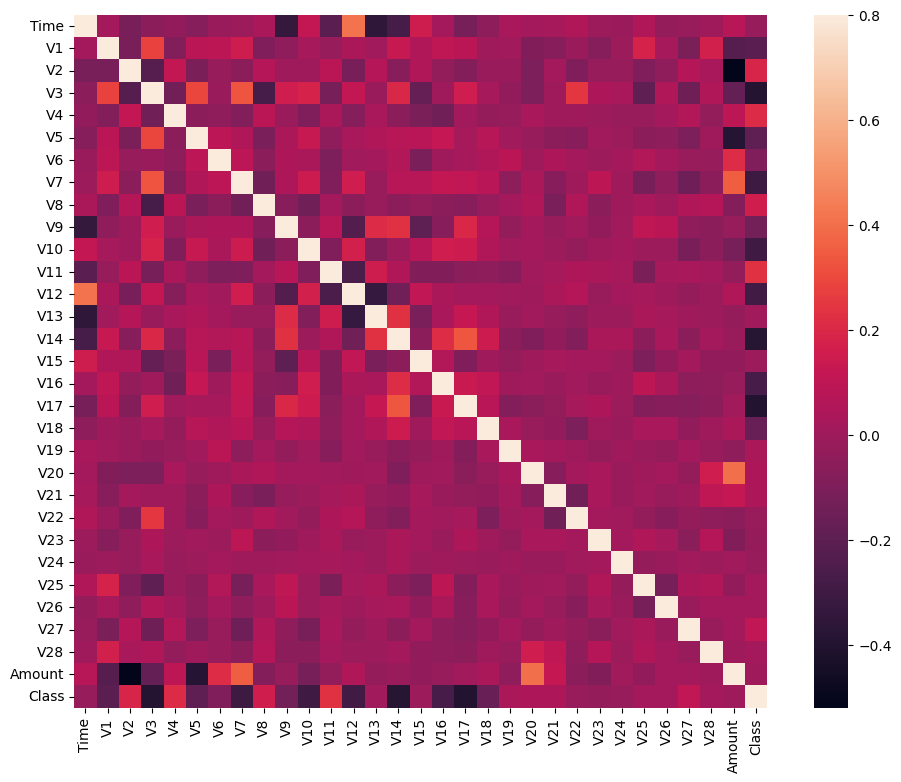

In [38]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [39]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values


(39702, 30)
(39702,)


In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming xData and yData are already defined and contain the dataset

# Remove samples where yData contains NaN values
mask = ~np.isnan(yData)
xData = xData[mask]
yData = yData[mask]

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.2, random_state=42)

# Impute missing values in the training and testing sets
imputer = SimpleImputer(strategy='mean')  # You can use 'median', 'most_frequent', etc.
xTrain = imputer.fit_transform(xTrain)
xTest = imputer.transform(xTest)

# Build the Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

# Make predictions
yPred = rfc.predict(xTest)

# Calculate accuracy or other metrics
accuracy = accuracy_score(yTest, yPred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9989925702052638


In [41]:
# Evaluating the classifier
# printing every score of the classifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9989925702052638
The precision is 0.92
The recall is 0.7931034482758621
The F1-Score is 0.851851851851852
The Matthews correlation coefficient is0.8537105284111068


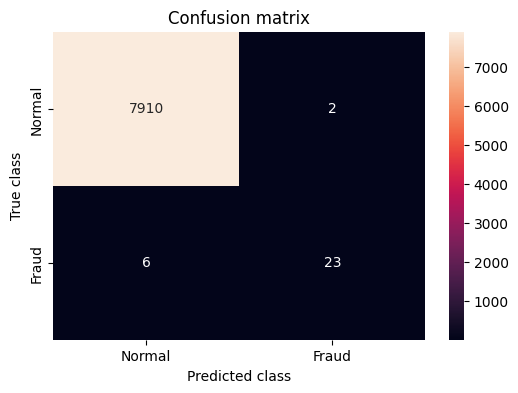

In [42]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(6, 4))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
